# **CMSC320 Final Project**

### **By: Brayden Ngo**

## Table of Contents

* 1.1 Introduction
* 1.2 Data Collection
* 2.1 Data Management/Representation
* 3.1 Exploratory Data Analysis
* 4.1 Predictive Model/Hypothesis Testing
* 5.1 Communication of Insights

## Libaries Used
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Statsmodel (Python Package)
* scikit-learn

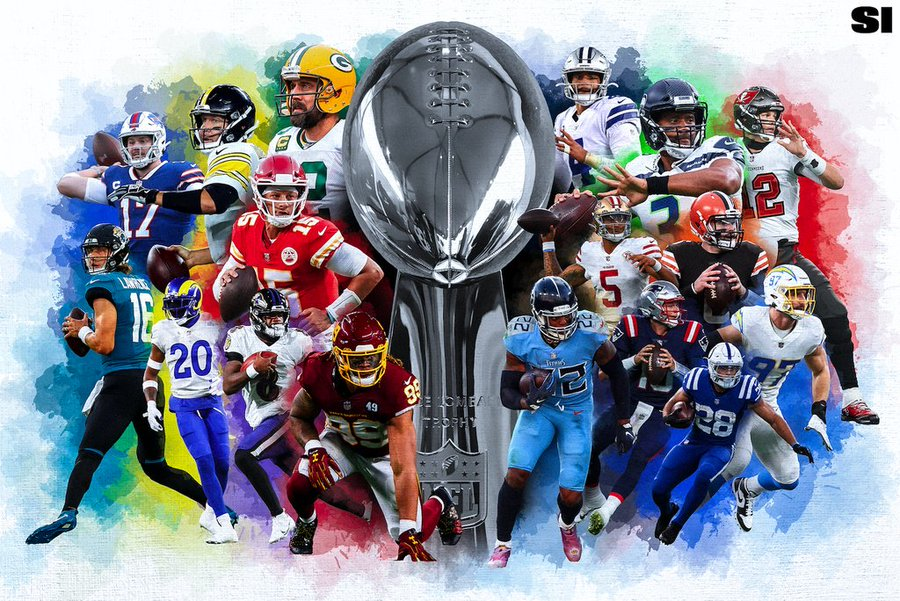

# What's In a Win: Predicting NFL Games

## 1.1: Introduction

The NFL is arguably the most popular sport in America. American football originated as a combination of soccer and rugby and was introduced at the college level in the late 1800s. By the 1920s, American football had grown in popularity to the degree where a professional league, the NFL was established. Over the years the NFL has grown tremendously in popularity as it now is estimated to be a nearly 9 billion dollar industry. In fact, the typical NFL regular season game will pull in up to 15.4 million viewers. This is significant margin compared to viewership of the other major US sports as the NBA has around 1.34 million viewers per game, the MLB has around 0.17 million, and the NHL has around 2.15 million viewers per game. As the NFL has expanded during the past decade, the use of technology has also been very prevalant. For instance, in the last few years the NFl has partenered with Amazon and its AWS software to apply machine learning algorithms to better communicate and engage with fans. For instance, AWS has been used to determine stats like passing score, 4th down decisions, expected rushing yards, and more unexpected ways. As we can see data analytics has become a more integral part of the modern NFL. However, we ourselves can get started with the basics of data analysis and getting familiar with fundamental data science concepts through the NFL. With all the different moving parts that can influence the potential of the game like passing efficiency, turnover differentials, and redzone efficiency there are potentially many different factors which can impact the outcome of an NFL game and warrant further analysis. Furthermore, we can determine if other concepts such as "home-field advantage" actually means anything in impacting the winner of an NFL game. Overall, in this following tutorial we will go through our own data science process in exploring the relationship between data and the winner of NFL games. Our hope is that this tutorial will not only give you some experience with the data science pipeline, but will help you gain insights into the NFl and maybe even use the information from here to play into what teams you bet on.

Sources to learn more about the NFl and data analytics within the NFL:

**https://www.sportszion.com/nfl-most-popular-sport-in-america/**

**https://aws.amazon.com/sports/nfl/#:~:text=The%20NFL%20uses%20AWS%20to,for%20players%20on%20the%20field.**

## 1.2: Data Collection

The first step in our process will be to obtain a dataset for NFL games. There are data for NFL games that can be scraped from sites such as ESPN or Pro Football Focus. However, for our dataset we can use a CSV of data of NFL games that has already been scrapped and put together on Kaggle. The following link will allow you to check out the dataset more in detail if you desire:

**https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn**

First, we'll need to import the dataset and examine what we're working with so let's go ahead and do that first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm

game_df = pd.read_csv('nfl_team_stats_2002-2021.csv')

display(game_df)

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2022-01-23,Rams,Buccaneers,24,20,4-11,3-14,0-0,2-4,355,...,2-5,2-3,15,15,0,0,34:08,25:52,30,27
5353,2022-01-23,Bills,Chiefs,23,30,6-14,8-13,4-4,1-1,313,...,3-3,3-5,9,11,0,0,27:37,36:38,36,42
5354,2022-01-30,Bengals,Chiefs,21,24,8-14,6-12,0-0,0-0,243,...,1-4,3-5,10,11,0,0,35:56,29:42,27,24
5355,2022-01-30,49ers,Rams,16,25,3-9,11-18,0-0,0-1,232,...,1-1,2-6,9,9,0,0,24:21,35:39,17,20


From the following dataset, it's clear that's a numerous amount of different columns in the dataset. Let's list out the different columns first so we can see everything that we can work with.

In [2]:
print(game_df.columns)

Index(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away', 'penalties_home',
       'redzone_away', 'redzone_home', 'drives_away', 'drives_home',
       'def_st_td_away', 'def_st_td_home', 'possession_away',
       'possession_home', 'score_away', 'score_home'],
      dtype='object')


Overall, I would say the majority of the features in this dataset will be very crticial to analyzing the outcome of an NFl game. The only one that could be considered to drop is def_st_td_away and def_st_td_home since typically the number of touchdowns scored by the defense and special teams will typically be very low (especially with rule changes moving the kickoff line to make returns harder) so they probably won't impact the result of the game so we will go ahead and drop those two columns. Additionally, we'll go ahead and drop fourth down conversions since 4th downs aren't frequently gone for in games typically (usually only if teams need to try to win the game).

In [3]:
game_df = game_df.drop('def_st_td_away', axis = 1)
game_df = game_df.drop('def_st_td_home', axis = 1)
game_df = game_df.drop('fourth_downs_away', axis = 1)
game_df = game_df.drop('fourth_downs_home', axis = 1)

The next thing that we might need to consider is separating out regular season games from playoff games. Afterall, there's a reason why commentators say the playoffs are a whole different beast. While it would be logical here to simply sort through the different dates and assign a new column to the type of game (either playoff or regular) an entry in the dataset corresponds to, the difficulty here is that the dates from season to season can differ widely. Also, with the addition of the 17th game during the 2021 NFl season, it will be very difficult to determine if games that were played in January or later are actually playoff or regular games from the season. In order to rectify this, we will use another data set that already provides the classification for each of the games and we will merge the two datasets together. Here is the Github Link to where you can find this particular data set (we will be using the Games table in particular):

**https://github.com/nflverse/nfldata/blob/master/DATASETS.md#games**

In [4]:
games_supp_df = pd.read_csv('games.csv')
display(games_supp_df.columns)
display(games_supp_df)

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,2022_18_NYG_PHI,2022,REG,18,2023-01-08,Sunday,13:00,NYG,NaN,PHI,...,NaN,NaN,NaN,NaN,NaN,Brian Daboll,Nick Sirianni,NaN,PHI00,Lincoln Financial Field
6405,2022_18_CLE_PIT,2022,REG,18,2023-01-08,Sunday,13:00,CLE,NaN,PIT,...,NaN,NaN,NaN,NaN,NaN,Kevin Stefanski,Mike Tomlin,NaN,PIT00,Acrisure Stadium
6406,2022_18_LA_SEA,2022,REG,18,2023-01-08,Sunday,13:00,LA,NaN,SEA,...,NaN,NaN,NaN,NaN,NaN,Sean McVay,Pete Carroll,NaN,SEA00,Lumen Field
6407,2022_18_ARI_SF,2022,REG,18,2023-01-08,Sunday,13:00,ARI,NaN,SF,...,NaN,NaN,NaN,NaN,NaN,Kliff Kingsbury,Kyle Shanahan,NaN,SFO01,Levi's Stadium


In [5]:
print(games_supp_df.columns)

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')


From the columns here the ones the only ones that we will need to keep include the season, game_type, gameday, the away_team, the home_team, and the result.

In [6]:
games_supp_df = games_supp_df[['season', 'game_type', 'gameday', 'away_team', 'home_team', 'result']]
display(games_supp_df)

,season,game_type,gameday,away_team,home_team,result
0,1999,REG,1999-09-12,MIN,ATL,-3.0
1,1999,REG,1999-09-12,KC,CHI,3.0
2,1999,REG,1999-09-12,PIT,CLE,-43.0
3,1999,REG,1999-09-12,OAK,GB,4.0
4,1999,REG,1999-09-12,BUF,IND,17.0
...,...,...,...,...,...,...
6404,2022,REG,2023-01-08,NYG,PHI,NaN
6405,2022,REG,2023-01-08,CLE,PIT,NaN
6406,2022,REG,2023-01-08,LA,SEA,NaN
6407,2022,REG,2023-01-08,ARI,SF,NaN


Now we can merge together the two tables by the gameday and the away and home teams. First we will rename the columns in our new table, change the abbreviationsw for team names and then we can proceed by using a left join.

In [7]:
games_supp_df_copy = games_supp_df.copy()
games_supp_df_copy.rename(columns = {'gameday': 'date', 'away_team': 'away', 'home_team': 'home'}, inplace = True)

team_hash = {'MIN': 'Vikings','KC': 'Chiefs','PIT': 'Steelers','OAK': 'Raiders','BUF': 'Bills','SF':'49ers','CAR':'Panthers',
             'NE': 'Patriots','ARI': 'Cardinals','DET': 'Lions','BAL': 'Ravens','NYG': 'Giants','CIN':'Bengals',
             'DAL':'Cowboys','MIA':'Dolphins','NYJ': 'Jets','JAX':'Jaguars','SEA':'Seahawks','SD': 'Chargers', 'GB': 'Packers',
             'DEN':'Broncos','IND':'Colts', 'WAS': 'Washington', 'TB':'Buccaneers', 'NO':'Saints','CLE':'Browns',
             'ATL':'Falcons', 'PHI':'Eagles', 'TEN':'Titans', 'CHI':'Bears','STL':'Rams','HOU':'Texans', 'LA':'Rams', 'LAC':'Chargers',
             'LV': 'Raiders'}
for index, row in games_supp_df_copy.iterrows():
    games_supp_df_copy.at[index, 'home'] = team_hash[games_supp_df_copy.at[index, 'home']]
    games_supp_df_copy.at[index, 'away'] = team_hash[games_supp_df_copy.at[index, 'away']]

display(games_supp_df_copy)

,season,game_type,date,away,home,result
0,1999,REG,1999-09-12,Vikings,Falcons,-3.0
1,1999,REG,1999-09-12,Chiefs,Bears,3.0
2,1999,REG,1999-09-12,Steelers,Browns,-43.0
3,1999,REG,1999-09-12,Raiders,Packers,4.0
4,1999,REG,1999-09-12,Bills,Colts,17.0
...,...,...,...,...,...,...
6404,2022,REG,2023-01-08,Giants,Eagles,NaN
6405,2022,REG,2023-01-08,Browns,Steelers,NaN
6406,2022,REG,2023-01-08,Rams,Seahawks,NaN
6407,2022,REG,2023-01-08,Cardinals,49ers,NaN


In [8]:
game_df = game_df.merge(games_supp_df_copy, on=['date', 'away', 'home'], how='left')
display(game_df)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_home,drives_away,drives_home,possession_away,possession_home,score_away,score_home,season,game_type,result
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,166,318,113,...,0-6,13,15,27:32,32:28,16,13,2002,REG,-3.0
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,193,242,73,...,0-8,17,18,21:06,39:08,37,31,2002,REG,-6.0
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,228,288,140,...,0-6,17,17,31:31,28:29,23,27,2002,REG,4.0
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,160,167,241,...,0-5,11,15,37:48,22:12,34,6,2002,REG,-28.0
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,276,352,194,...,0-10,20,17,30:16,29:44,40,39,2002,REG,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2022-01-23,Rams,Buccaneers,24,20,4-11,3-14,355,308,73,...,2-3,15,15,34:08,25:52,30,27,2021,DIV,-3.0
5353,2022-01-23,Bills,Chiefs,23,30,6-14,8-13,313,370,109,...,3-5,9,11,27:37,36:38,36,42,2021,DIV,6.0
5354,2022-01-30,Bengals,Chiefs,21,24,8-14,6-12,243,236,116,...,3-5,10,11,35:56,29:42,27,24,2021,CON,-3.0
5355,2022-01-30,49ers,Rams,16,25,3-9,11-18,232,326,50,...,2-6,9,9,24:21,35:39,17,20,2021,CON,3.0


Perfect! Now, that we've combined the two tables we've collected all of our data so we can move on to more precisely cleaning up the data and making any adjustments that we will need to do before plotting anything in later steps. 

## 2.1 Data Management/Representation

The first thing we will do is to drop all the row that aren't regular season games (i.e. this means dropping any rows whose game_type value isn't 'REG')

In [9]:
game_df = game_df[game_df['game_type'] == 'REG']


The next thing we need to do is to calculate new columns for our data frame. For example, one thing that will be helpful is to calculate the average winning percentage by team. Another thing we will want to consider is to add a new column so we can more easily tell who is the winner of the game instead of having to compare the scores for the home and away team every single time we examine an entry. Additionally, the format for columns such as third_down_away and third_downs_home are in a format of a string like '4-11' and this won't be useable for numerical analysis so we'll need to address this. Additionally, we will drop games that were tied since we can't determine a winner. Other things we'll add is a column separating the current format of penalities like '5-29' into 5 for the number of penalities and 29 for the yardage. 

In [10]:
# drops all games that ended in a tie
game_df = game_df[~(game_df['score_away'] == game_df['score_home'])]

# create a column to mark if home team won or not
game_df['home_team_winner'] = np.nan

# create a column for penalty count for home team
game_df['penalty_cnt_home'] = np.nan

# create a column for penalty yards for home team
game_df['penalty_yards_home'] = np.nan

# create a column for penalty count for away team
game_df['penalty_cnt_away'] = np.nan

# create a column for penalty yards for away team
game_df['penalty_yards_away'] = np.nan

# create a column for redzone trips in game for home team
game_df['redzone_visits_home'] = np.nan

# create a column for redzone ratio for home team
game_df['redzone_ratio_home'] = np.nan

# create a column for redzone trips in game for away team
game_df['redzone_visits_away'] = np.nan

# create a column for redzone ratio for away team
game_df['redzone_ratio_away'] = np.nan

# create a column for third down ratio for away team
game_df['third_down_ratio_home'] = np.nan

# create a column for third down ratio in game for home team
game_df['third_down_ratio_away'] = np.nan

# create a new column for the winner
game_df['Winner'] = np.nan

######################
game_df['comp_att_away_ratio'] = np.nan
game_df['comp_att_home_ratio'] = np.nan


#####################
game_df['sacks_home_cnt'] = np.nan
game_df['sacks_away_cnt'] = np.nan

# assign winners for each row
for index, row in game_df.iterrows():
    game_df.loc[index, 'penalty_cnt_home'] = int(row.penalties_home[0:row.penalties_home.index('-')])
    game_df.loc[index,'penalty_yards_home'] = int(row.penalties_home[row.penalties_home.index('-') + 1:])


    game_df.loc[index,'penalty_cnt_away'] = int(row.penalties_away[0:row.penalties_away.index('-')])

    game_df.loc[index,'penalty_yards_away'] = int(row.penalties_away[row.penalties_away.index('-') + 1:])
    
    # fixing the times
    game_df.at[index, 'possession_away'] =  game_df.at[index, 'possession_away'].replace(':', '')
    game_df.at[index, 'possession_home'] = game_df.at[index, 'possession_home'].replace(':', '')
    
    game_df.at[index, 'sacks_home_cnt'] =  int(row.sacks_home[0:row.sacks_home.index('-')])
    game_df.at[index, 'sacks_away_cnt'] = int(row.sacks_away[0:row.sacks_away.index('-')])
    
    # completion attempts
    game_df.at[index, 'comp_att_away_ratio']  = int(row.comp_att_away[0:row.comp_att_away.index('-')]) / int(row.comp_att_away[row.comp_att_away.index('-') + 1:])
    game_df.at[index, 'comp_att_home_ratio']   = int(row.comp_att_home[0:row.comp_att_home.index('-')]) / int(row.comp_att_home[row.comp_att_home.index('-') + 1:])

    
    if(row.score_away > row.score_home):
        game_df.loc[index, 'Winner'] = 'Away'
        game_df.loc[index, 'home_team_winner'] = False
    else:
        game_df.loc[index, 'Winner'] = 'Home'
        game_df.loc[index, 'home_team_winner'] = True
        
        
    game_df.loc[index, 'redzone_visits_home'] = int(row.redzone_home[row.redzone_home.index('-') + 1:])
    game_df.loc[index, 'third_down_ratio_home'] = int(row.third_downs_home[0:row.third_downs_home.index('-')]) / int(row.third_downs_home[row.third_downs_home.index('-') + 1:])
        
    if int(row.redzone_home[row.redzone_home.index('-') + 1:]) != 0:
            game_df.loc[index, 'redzone_ratio_home'] = int(row.redzone_home[0:row.redzone_home.index('-')]) / int(row.redzone_home[row.redzone_home.index('-') + 1:])
    else:
            game_df.loc[index, 'redzone_ratio_home'] = 0
            
            
    game_df.loc[index, 'redzone_visits_away'] = int(row.redzone_away[row.redzone_away.index('-') + 1:])
    game_df.loc[index, 'third_down_ratio_away'] = int(row.third_downs_away[0:row.third_downs_away.index('-')]) / int(row.third_downs_away[row.third_downs_away.index('-') + 1:])
        
    if int(row.redzone_away[row.redzone_away.index('-') + 1:]) != 0:
            game_df.loc[index, 'redzone_ratio_away'] = int(row.redzone_away[0:row.redzone_away.index('-')]) / int(row.redzone_away[row.redzone_away.index('-') + 1:])
    else:
            game_df.loc[index, 'redzone_ratio_away'] = 0

# convert the strings of time to integers
game_df.possession_away = pd.to_numeric(game_df.possession_away, errors='coerce')
game_df.possession_home = pd.to_numeric(game_df.possession_home, errors='coerce')
display(game_df.tail(5))

display(game_df['rushing_attempts_home'])

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_ratio_home,redzone_visits_away,redzone_ratio_away,third_down_ratio_home,third_down_ratio_away,Winner,comp_att_away_ratio,comp_att_home_ratio,sacks_home_cnt,sacks_away_cnt
5339,2022-01-09,49ers,Rams,23,19,9-14,10-17,314,201,135,...,0.750000,4.0,0.500000,0.588235,0.642857,Away,0.727273,0.656250,5.0,3.0
5340,2022-01-09,Patriots,Dolphins,21,23,5-10,7-15,245,103,134,...,0.666667,4.0,0.750000,0.466667,0.500000,Home,0.666667,0.681818,1.0,2.0
5341,2022-01-09,Seahawks,Cardinals,19,20,8-12,9-18,229,187,202,...,0.333333,3.0,0.666667,0.500000,0.666667,Away,0.576923,0.717949,5.0,1.0
5342,2022-01-09,Panthers,Buccaneers,18,21,4-14,4-11,207,324,110,...,1.000000,4.0,0.500000,0.363636,0.285714,Home,0.674419,0.743590,1.0,2.0
5343,2022-01-09,Chargers,Raiders,27,24,4-18,8-17,355,172,85,...,0.600000,4.0,1.000000,0.470588,0.222222,Home,0.531250,0.567568,3.0,3.0


0       22
1       32
2       26
3       13
4       20
        ..
5339    27
5340    43
5341    28
5342    20
5343    34
Name: rushing_attempts_home, Length: 5121, dtype: int64

## 2.2. Making a New Dataframe

In [11]:
# create a new empty dataframe
team_df = pd.DataFrame()

# get the list of teams
teams = game_df['away'].unique()
team_df['teams'] = teams

# create list for the wins for each team
team_win_lst = []
# create list for third down conversion
third_down_rate_lst = []
# create list for passing yards
passing_yards_lst = []
# create list for rushing yards
rushing_yards_lst = []
# create list for total yards
total_yards_lst = []
# create list for completion percentage
comp_percentage_lst = []
# create list for sacks
sacks_lst = []
# create list for rushing attempts
rushing_attempts_lst = []
# create list for fumbles
fumbles_lst = []
# create list for interceptions
interceptions_lst = []
# create list for # of penalties
penalties_lst = []
# create list for yards by penalties
penalty_yards_lst = []
# create list for number of drives
drives_lst = []
# create list for redzone trips
redzone_trips_lst = []
# create list for redzones ratio (touchdowns made out of tripe)
redzone_ratio_lst = []
# create list for turnover total
turnovers_lst = []

# create list for avg time of possession
time_lst = []

for team in teams:
    wins = 0
    third_downs_attempted = 0
    third_downs_made = 0
    passing_yards = 0
    rushing_yards = 0
    total_yards = 0
    completions_made = 0
    completions_attempted = 0
    sacks = 0
    rushing_attempts = 0
    fumbles = 0
    interceptions = 0
    penalties = 0
    penalty_yards = 0
    drives = 0
    redzone_trips = 0
    redzone_made = 0
    turnovers = 0
    time = 0
    
    temp_df = game_df[(game_df['away'] == team) | (game_df['home'] == team)]
    for index, row in temp_df.iterrows():
        if row.away == team and row.score_away > row.score_home:
            wins += 1
        elif row.home == team and row.score_home > row.score_away:
            wins += 1
           
        if row.away == team:
            third_downs_made += int(row.third_downs_away[0:row.third_downs_away.index('-')])
            third_downs_attempted += int(row.third_downs_away[row.third_downs_away.index('-') + 1:])
            passing_yards += row.passing_yards_away
            rushing_yards += row.rushing_yards_away
            total_yards += row.total_yards_away
            completions_made += int(row.comp_att_away[0:row.comp_att_away.index('-')])
            completions_attempted += int(row.comp_att_away[row.comp_att_away.index('-') + 1:])
            sacks += int(row.sacks_away[0:row.sacks_away.index('-')])
            rushing_attempts += row.rushing_attempts_away
            fumbles += row.fumbles_away
            interceptions += row.int_away
            penalties += int(row.penalties_away[0:row.penalties_away.index('-')])
            penalty_yards += int(row.penalties_away[row.penalties_away.index('-') + 1:])
            drives += row.drives_away
            redzone_made += int(row.redzone_away[0:row.redzone_away.index('-')])
            redzone_trips += int(row.redzone_away[row.redzone_away.index('-') + 1:])
            turnovers += row.turnovers_away
            time += row.possession_away
        else:
            third_downs_made += int(row.third_downs_home[0:row.third_downs_home.index('-')])
            third_downs_attempted += int(row.third_downs_home[row.third_downs_home.index('-') + 1:])
            passing_yards += row.passing_yards_home
            rushing_yards += row.rushing_yards_home
            total_yards += row.total_yards_home
            completions_made += int(row.comp_att_home[0:row.comp_att_home.index('-')])
            completions_attempted += int(row.comp_att_home[row.comp_att_home.index('-') + 1:])
            sacks += int(row.sacks_home[0:row.sacks_home.index('-')])
            rushing_attempts += row.rushing_attempts_home
            fumbles += row.fumbles_home
            interceptions += row.int_home
            penalties += int(row.penalties_home[0:row.penalties_home.index('-')])
            penalty_yards += int(row.penalties_home[row.penalties_home.index('-') + 1:])
            drives += row.drives_home
            redzone_made += int(row.redzone_home[0:row.redzone_home.index('-')])
            redzone_trips += int(row.redzone_home[row.redzone_home.index('-') + 1:])
            turnovers += row.turnovers_home
            time += row.possession_home
        
    team_win_lst.append(wins / len(temp_df))
    third_down_rate_lst.append(third_downs_made / third_downs_attempted)
    passing_yards_lst.append(passing_yards / len(temp_df))
    rushing_yards_lst.append(rushing_yards / len(temp_df))
    total_yards_lst.append(total_yards / len(temp_df))
    comp_percentage_lst.append(completions_made / completions_attempted)
    sacks_lst.append(sacks/ len(temp_df))
    rushing_attempts_lst.append(rushing_attempts / len(temp_df))
    fumbles_lst.append(fumbles / len(temp_df))
    interceptions_lst.append(interceptions / len(temp_df))
    penalties_lst.append(penalties / len(temp_df))
    penalty_yards_lst.append(penalty_yards / len(temp_df))
    drives_lst.append(drives / len(temp_df))
    redzone_trips_lst.append(redzone_trips / len(temp_df))
    redzone_ratio_lst.append(redzone_made / redzone_trips)
    turnovers_lst.append(turnovers / len(temp_df))
    time_lst.append(time / len(temp_df))

team_df['win_rate'] = team_win_lst
team_df['third_down_rate'] = third_down_rate_lst
team_df['passing_yards_avg'] = passing_yards_lst
team_df['rushing_yards_avg'] = rushing_yards_lst
team_df['total_yards_avg'] = total_yards_lst
team_df['comp_percentage'] = comp_percentage_lst
team_df['sack_avg'] = sacks_lst
team_df['rushing_attempts_avg'] = rushing_attempts_lst 
team_df['fumbles_avg'] = fumbles_lst
team_df['interceptions_avg'] = interceptions_lst
team_df['penalties_avg'] = penalties_lst
team_df['penalties_yards_avg'] = penalty_yards_lst
team_df['drives_avg'] = drives_lst
team_df['redzone_trips_avg'] = redzone_trips_lst
team_df['redzone_ratio'] = redzone_ratio_lst
team_df['turnover_avg'] = turnovers_lst
team_df['possession_avg'] = time_lst
display(team_df.head(10))


,teams,win_rate,third_down_rate,passing_yards_avg,rushing_yards_avg,total_yards_avg,comp_percentage,sack_avg,rushing_attempts_avg,fumbles_avg,interceptions_avg,penalties_avg,penalties_yards_avg,drives_avg,redzone_trips_avg,redzone_ratio,turnover_avg,possession_avg
0,49ers,0.456250,0.362110,202.721875,119.950000,322.671875,0.604096,2.653125,27.618750,0.706250,0.875000,6.471875,53.637500,12.487500,3.303125,0.356670,1.581250,2970.462500
1,Jets,0.420561,0.376327,195.956386,115.791277,311.747664,0.596262,2.467290,28.127726,0.588785,1.056075,5.856698,49.233645,12.267913,3.090343,0.348790,1.644860,2986.074766
2,Vikings,0.514107,0.393597,217.711599,127.087774,344.799373,0.640479,2.507837,27.934169,0.667712,0.855799,6.385580,53.257053,12.275862,3.470219,0.373984,1.523511,3009.294671
3,Chargers,0.535826,0.427191,246.274143,112.710280,358.984424,0.640965,1.928349,27.352025,0.566978,0.884735,6.336449,51.853583,11.825545,3.757009,0.407131,1.451713,3081.339564
4,Chiefs,0.557632,0.399613,229.068536,124.146417,353.214953,0.626895,2.190031,27.697819,0.582555,0.738318,6.221184,51.423676,12.065421,3.520249,0.377876,1.320872,3005.816199
5,Falcons,0.510972,0.418109,233.181818,116.188088,349.369906,0.628650,2.235110,27.222571,0.579937,0.849530,5.796238,50.360502,11.871473,3.536050,0.383865,1.429467,3018.924765
6,Eagles,0.567398,0.399583,238.012539,123.235110,361.247649,0.608857,2.435737,27.159875,0.749216,0.858934,6.648903,55.103448,12.460815,3.510972,0.405357,1.608150,2968.194357
7,Lions,0.347962,0.369529,234.536050,92.808777,327.344828,0.604919,2.363636,23.595611,0.595611,1.078370,6.714734,55.689655,12.257053,3.112853,0.399799,1.673981,2918.880878
8,Cardinals,0.457680,0.369627,228.012539,97.526646,325.539185,0.601331,2.489028,25.028213,0.692790,1.112853,6.771160,54.768025,12.614420,3.316614,0.403592,1.805643,2955.398119
9,Ravens,0.582555,0.392490,205.573209,128.669782,334.242991,0.609504,2.168224,29.875389,0.651090,0.878505,6.819315,57.302181,12.520249,3.414330,0.388686,1.529595,3088.149533


Now that we have our new dataframe with different statistics according to each team, we can begin to plot our data and start performing an exploratory analysis. 

## 3.1: Exploratory Data Analysis

## 3.1.2 Win Rates of Teams

The first thing we'll do before going into a deeper analysis into games is simply to graph which teams have the best win rates. 

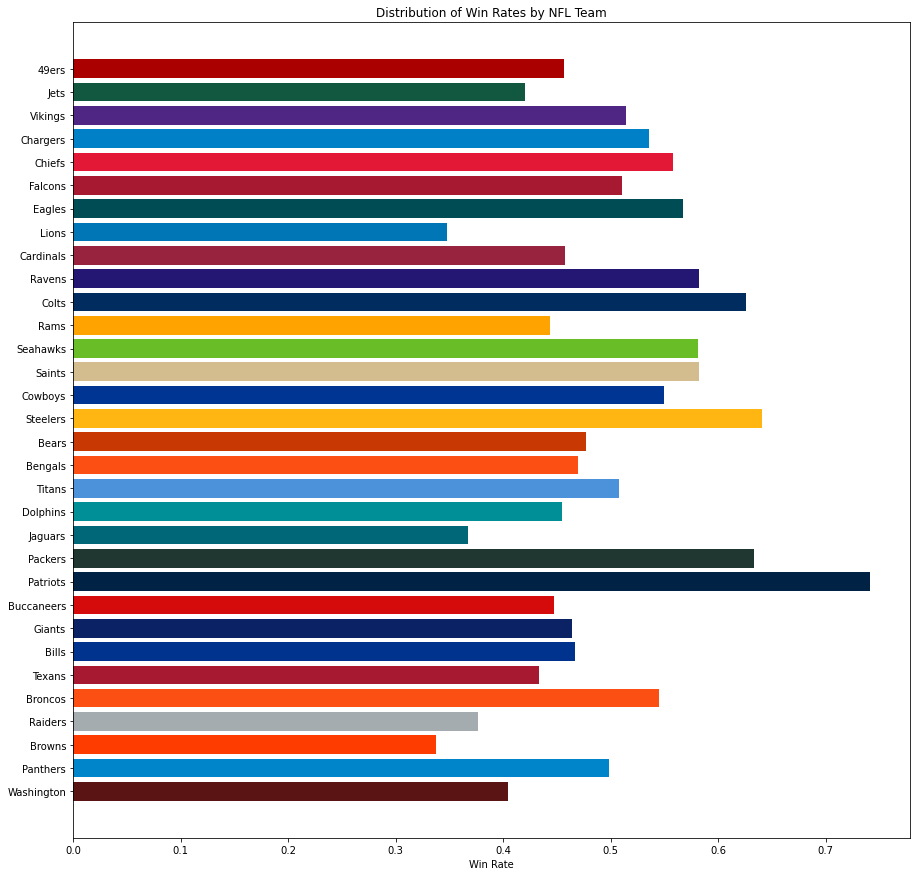

In [12]:
fig, ax = plt.subplots(figsize = (15,15))

teams = tuple(team_df['teams'])
y_pos = np.arange(len(teams))
win_rates = team_df['win_rate']
colors = ['#AA0000', '#125740', '#4F2683', '#0080C6', '#E31837', '#A71930', '#004C54', '#0076B6', '#97233F', '#241773', '#002C5F',
         '#FFA300', '#69BE28', '#D3BC8D', '#003594', '#FFB612', '#C83803', '#FB4F14', '#4B92DB', '#008E97', '#006778', '#203731',
         '#002244', '#D50A0A', '#0B2265', '#00338D', '#A71930', '#FB4F14','#A5ACAF', '#FF3C00', '#0085CA', '#5A1414']

ax.barh(y_pos, win_rates, align='center', color = colors )
ax.set_yticks(y_pos, labels=teams)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Win Rate')
ax.set_title('Distribution of Win Rates by NFL Team')

plt.show()

From the horizontal bar graph above, we can see that some of the most successful teams in terms of win rate include the Patriots (who have over a 70 percent win rate), the Steelers, Packers, Colts, Ravens, Seahawks, and Saints. Some of the lowest winning teams include the Lions, Browns, Jaguars, and the Raiders. Now that we've taken a look at the win rates, let's start analyzing the impact of different factors on the games and teams' winrate. 

First, let's take a look at the relationship between the total yards average in a game compared to the win rate of a team. We can do this simply by using a scatter plot. We'll also add a regression line just so we can take a look at the relationship better.

## 3.1.3 Examining Relation Between Total Yards and Win Rate

Text(0.5, 1.0, 'Average Win Rate vs. Average Total Yards by NFL Team')

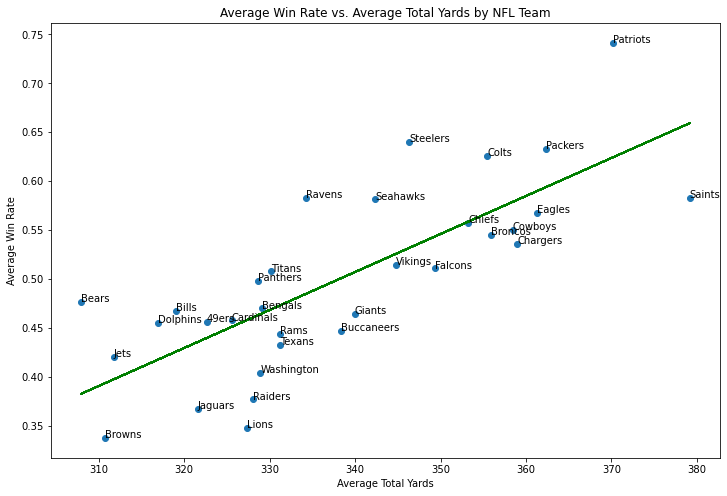

In [13]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['total_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_total_yards = list(team_df['total_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_total_yards[index], avg_win_rate[index]))
    x = np.array(avg_total_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Total Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Total Yards by NFL Team')

From the graph above it's clear that the more yards accumulated the higher the win rate. Let's see if we can get a better deeper breakdown between rushing yards and passing yards on wins.

## 3.1.4 Passing Yards Relationship with Win Rate

Text(0.5, 1.0, 'Average Win Rate vs. Average Passing Yards by NFL Team')

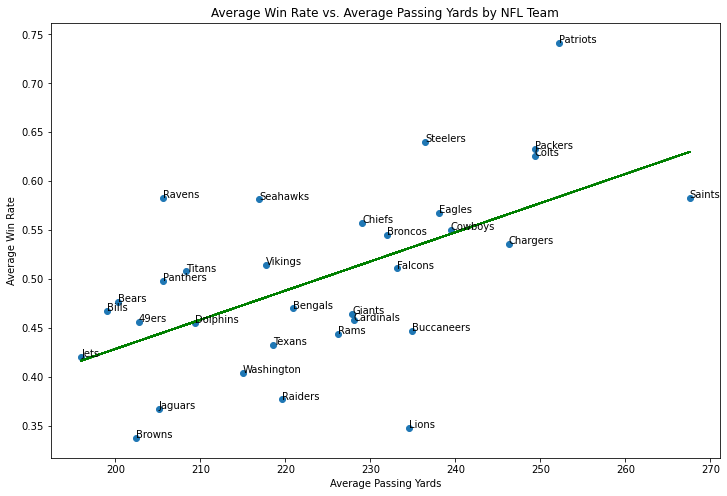

In [14]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['passing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_passing_yards = list(team_df['passing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_passing_yards[index], avg_win_rate[index]))
    x = np.array(avg_passing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Passing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Passing Yards by NFL Team')

## 3.1.5 Rushing Yards Relationship with Win Rate

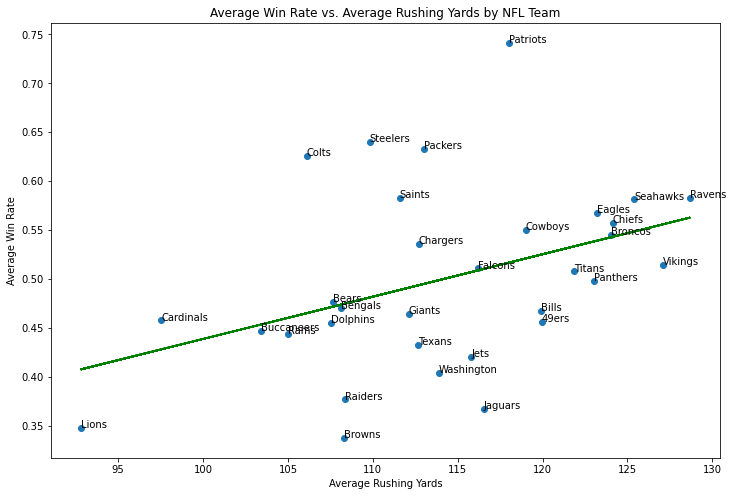

In [15]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['rushing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_rushing_yards = list(team_df['rushing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_rushing_yards[index], avg_win_rate[index]))
    x = np.array(avg_rushing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Rushing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Rushing Yards by NFL Team')
plt.show()

From the graphs above it seems that more passing and more rushing yards individaully result in an increase average win rate. Although, it appears that the the slope for passing yards is steeper which indicates a stronger relation between passing yards and win rate. Let's lastly create a bar graph to directly compare passing and rushing yards for winning and losing teams.

## 3.1.6. Comparison Between Rushing and Passing Yards 

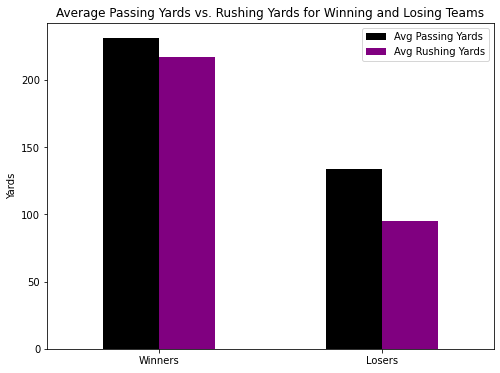

In [16]:
winning_values = []
losing_values = []

win_pass_total = 0
win_run_total = 0
lose_pass_total = 0
lose_run_total = 0

for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_pass_total += row.passing_yards_home
        win_run_total += row.rushing_yards_home
        lose_pass_total += row.passing_yards_away
        lose_run_total += row.rushing_yards_away
    else:
        win_pass_total += row.passing_yards_away
        win_run_total += row.rushing_yards_away
        lose_pass_total += row.passing_yards_home
        lose_run_total += row.rushing_yards_home
winning_values.append(win_pass_total / len(game_df))
winning_values.append(win_run_total / len(game_df))

losing_values.append(lose_pass_total / len(game_df))
losing_values.append(lose_run_total / len(game_df))


index = ['Winners', 'Losers']


df = pd.DataFrame({'Avg Passing Yards': winning_values,
                    'Avg Rushing Yards': losing_values}, index=index)

ax = df.plot.bar(rot=0, color={"Avg Passing Yards": "black", "Avg Rushing Yards": "purple"}, ylabel = 'Yards', title = 'Average' + 
                 ' Passing Yards vs. Rushing Yards for Winning and Losing Teams', figsize = (8,6))

From here it's evident that although teams have more passing yards whether they win or lose, the gap between passing and rushing yards for losing teams is significantly greater. A possible reason for this is that when teams are playing from behind, they will be forced to pass more since they need to move the ball down the field quicker to score which would result in less rushing and more passing. Last, let's compare passing and rushing for individual games. We can do this by plotting the result column (which is the home score - away score) and compare to the difference between the home team's passing scores and rushing scores respectively. We will also sepearate the plots into periods of 5 years so we can see if there's any fluctuation over the years (and it also it reduces the amount of points on a singular plot so it will be less cluttered). 

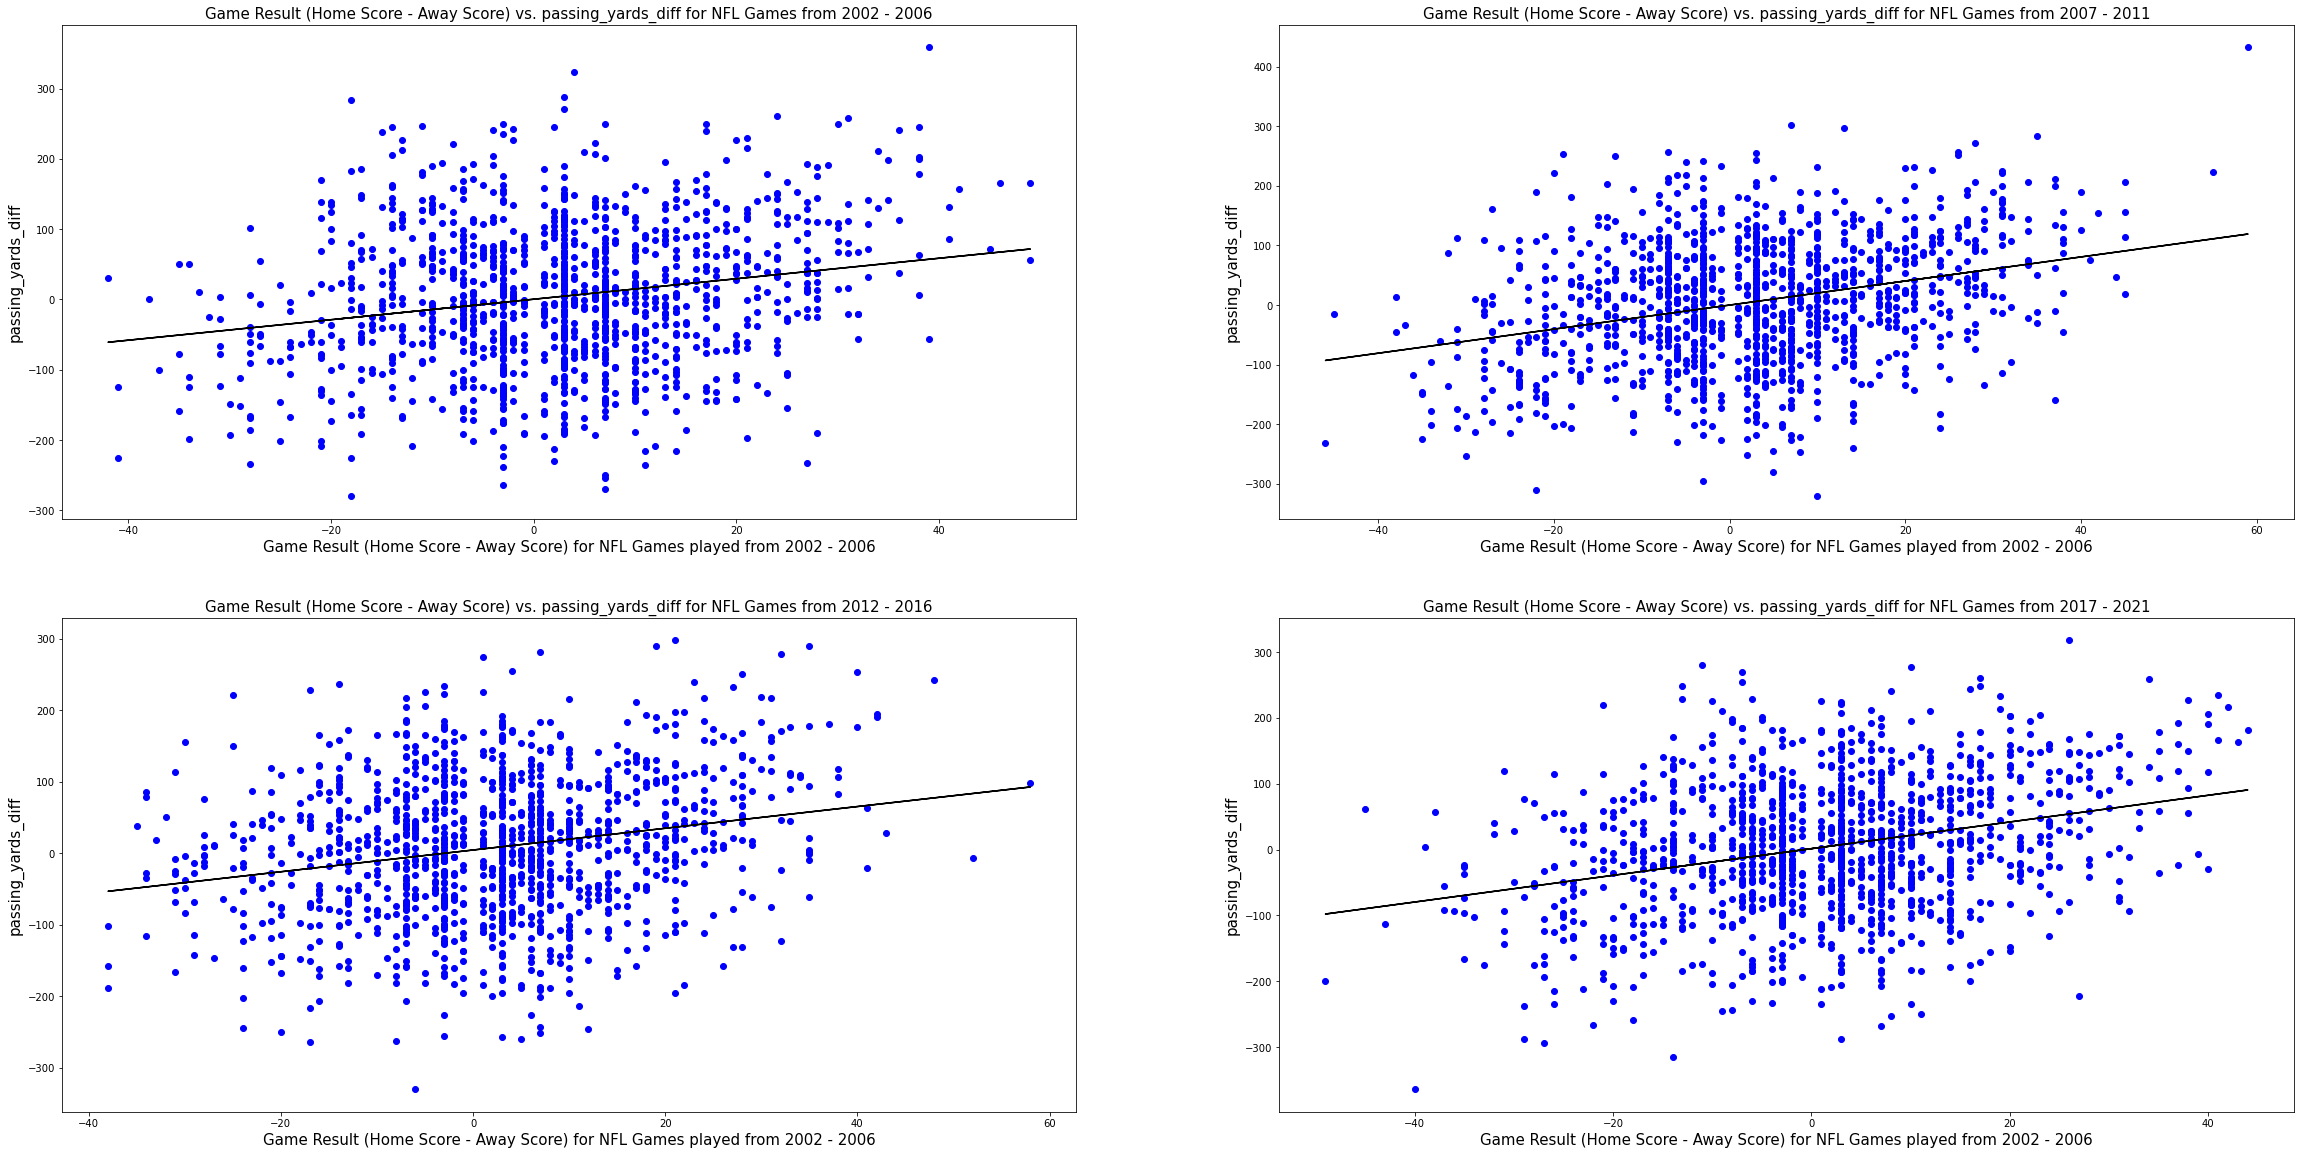

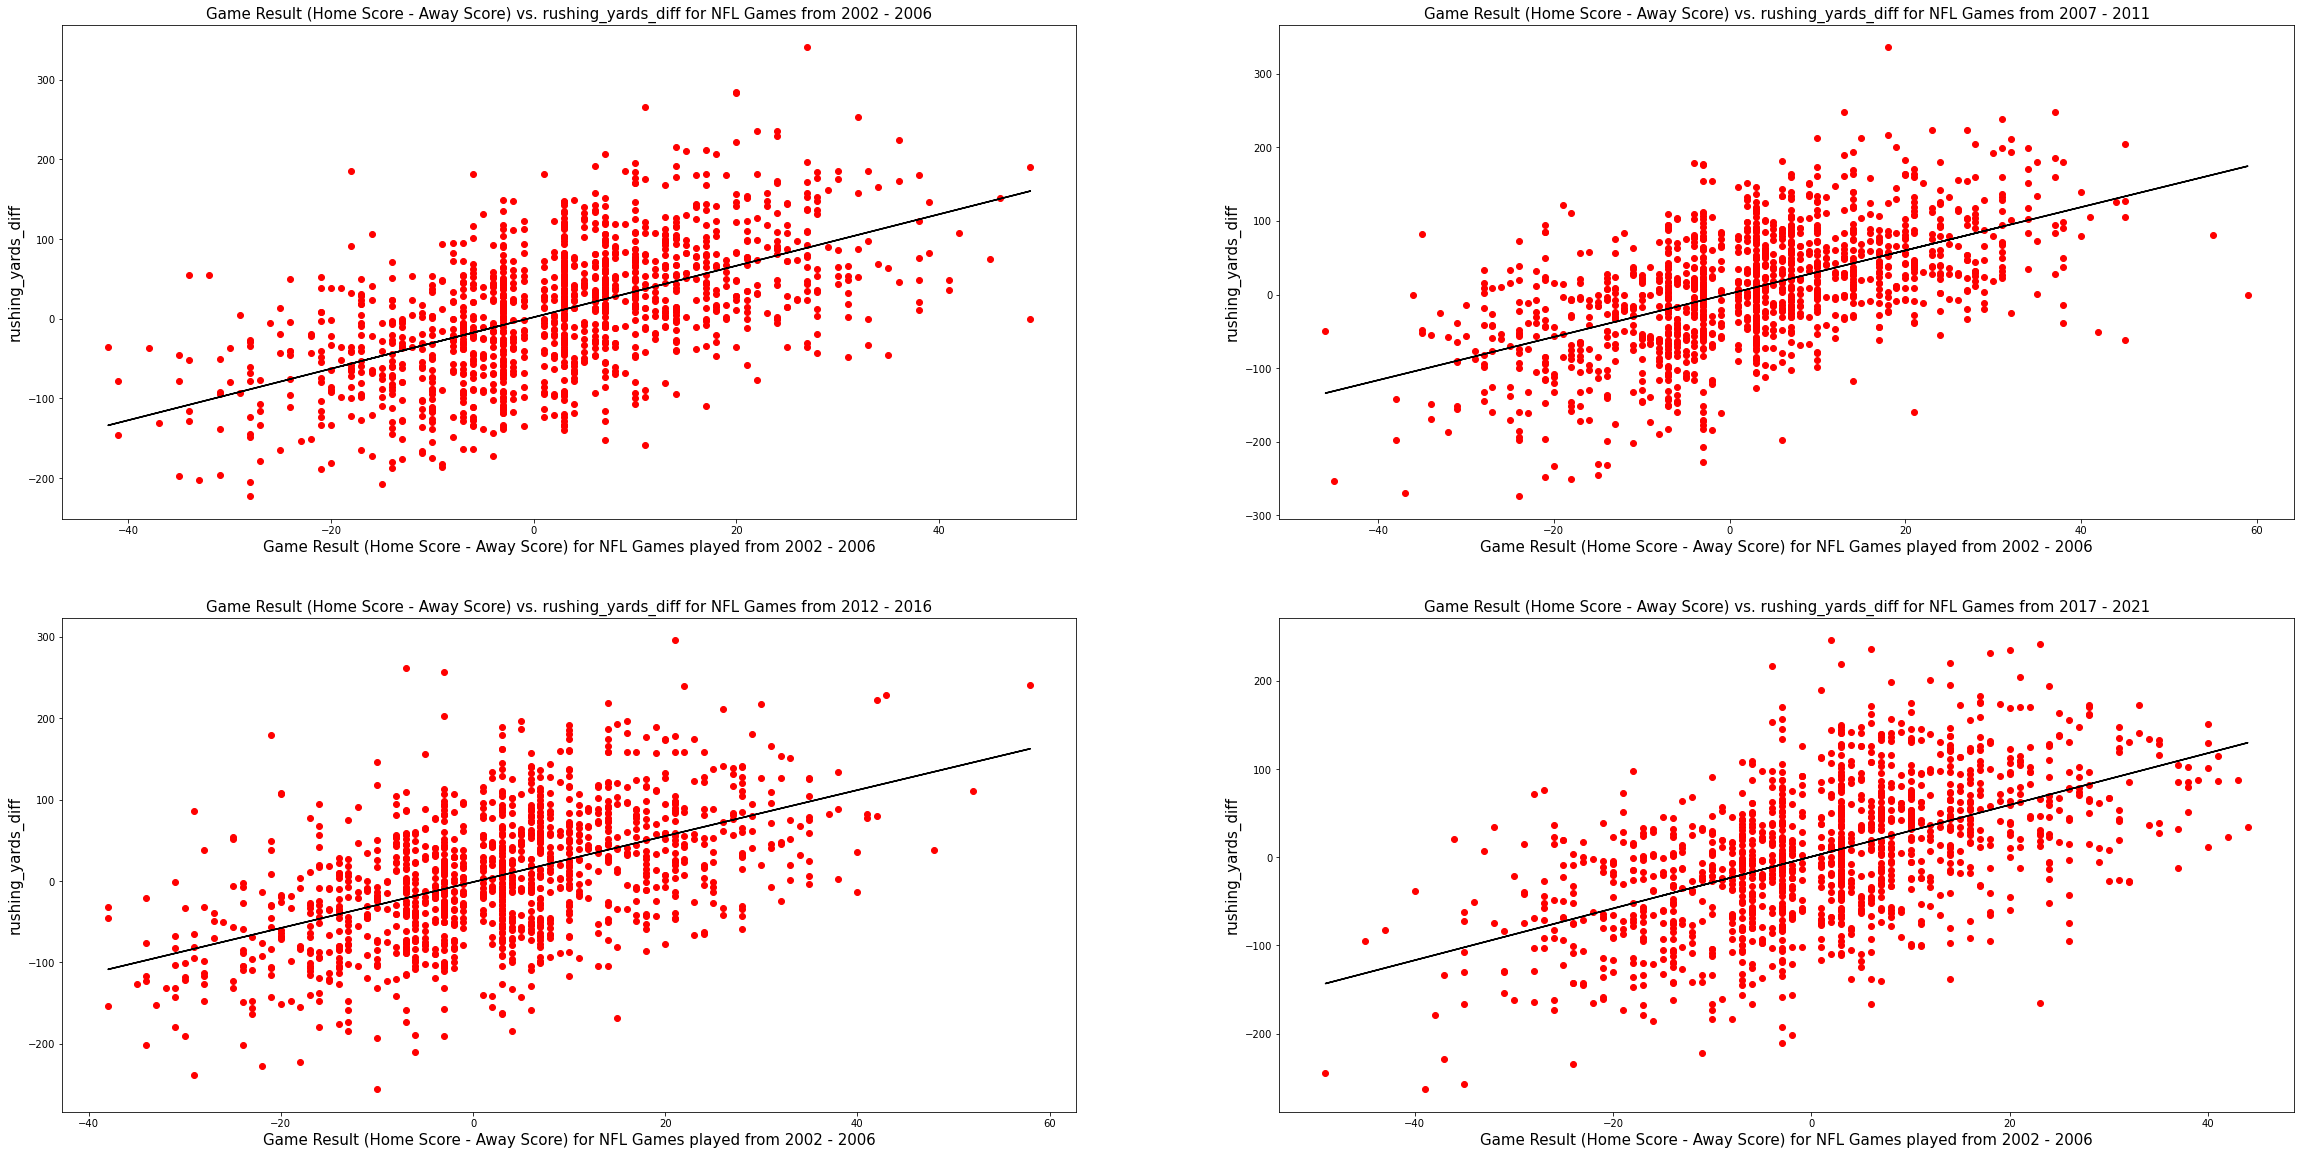

In [46]:
def splitPeriodPlot(new_col_name, home_stat, away_stat, plot_color, regression_color):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 20))  

    # create a new column to find the difference between the home team's passing yards 
    game_df[new_col_name] = game_df[home_stat] - game_df[away_stat]
    p1_df = game_df[game_df['season'].isin([2002, 2003, 2004, 2005, 2006])]
    p2_df = game_df[game_df['season'].isin([2007, 2008, 2009, 2010, 2011])]
    p3_df = game_df[game_df['season'].isin([2012, 2013, 2014, 2015, 2016])]
    p4_df = game_df[game_df['season'].isin([2017, 2018, 2019, 2020, 2021])]


    axes[0,0].scatter(p1_df['result'], p1_df[new_col_name], c = plot_color)
    axes[0,0].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2002 - 2006', fontsize = 15)
    axes[0,0].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2002 - 2006', fontsize = 15)
    axes[0,0].set_ylabel(new_col_name, fontsize = 15)
    axes[0,1].scatter(p2_df['result'], p2_df[new_col_name], c = plot_color)
    axes[0,1].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2007 - 2011', fontsize = 15)
    axes[0,1].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2002 - 2006', fontsize = 15)
    axes[0,1].set_ylabel(new_col_name, fontsize = 15)
    axes[1,0].scatter(p3_df['result'], p3_df[new_col_name], c = plot_color)
    axes[1,0].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2012 - 2016', fontsize = 15)
    axes[1,0].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2002 - 2006', fontsize = 15)
    axes[1,0].set_ylabel(new_col_name, fontsize = 15)
    axes[1,1].scatter(p4_df['result'], p4_df[new_col_name], c = plot_color)
    axes[1,1].set_title('Game Result (Home Score - Away Score)' + ' vs. ' + new_col_name +  ' for NFL Games from 2017 - 2021', fontsize = 15)
    axes[1,1].set_xlabel('Game Result (Home Score - Away Score) for NFL Games played from 2002 - 2006', fontsize = 15)
    axes[1,1].set_ylabel(new_col_name, fontsize = 15)

    x = np.array(p1_df['result'])
    y = np.array(p1_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[0,0].plot(x, m*x + b, color = regression_color)


    x = np.array(p2_df['result'])
    y = np.array(p2_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[0,1].plot(x, m*x + b, color = regression_color)

    x = np.array(p3_df['result'])
    y = np.array(p3_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[1,0].plot(x, m*x + b, color = regression_color)

    x = np.array(p4_df['result'])
    y = np.array(p4_df[new_col_name])

    m, b = np.polyfit(x, y, 1)
    axes[1,1].plot(x, m*x + b, color = regression_color)

splitPeriodPlot('passing_yards_diff', 'passing_yards_home', 'passing_yards_away', 'blue', 'black')
splitPeriodPlot('rushing_yards_diff', 'rushing_yards_home', 'rushing_yards_away', 'red', 'black')

From the plots above, it's clear that for all graphs the more passing or rushing yards means a more positive scoring differential (the home team which would be the winner is scoring more when having more rushing or passing yards compared to the losing team). Although, I do think there's something very interesting to note here for future reference. Although on our plots of rushing and passing yard averages for different teams passing yards seemed to have a more positive regression line, I would say on these scatter plots of individual games, rushing yards seems to have a stronger relationship to the winner of the game. For instance, looking at the period from 2002 - 2006, it's very clear that the plot for rushing yards has a steeper sloper for its regression line compared to passing yards which seems to imply that rushing yards may actually be a better indicator of the winner of a game.

Now let's take a look at the effect of third down conversions on team winning percentage. For those not familiar with what this means, completing a third down essentially will allow a team's offense to continue moving the ball down the field with a new set of downs. If the third down is not converted a team can either try again on a 4th down (but give possession over if they fail) or the alternative which is typically to punt the ball to the other team.

## 3.1.7 Examining Third Down Conversion Rates Effect on Win Rate

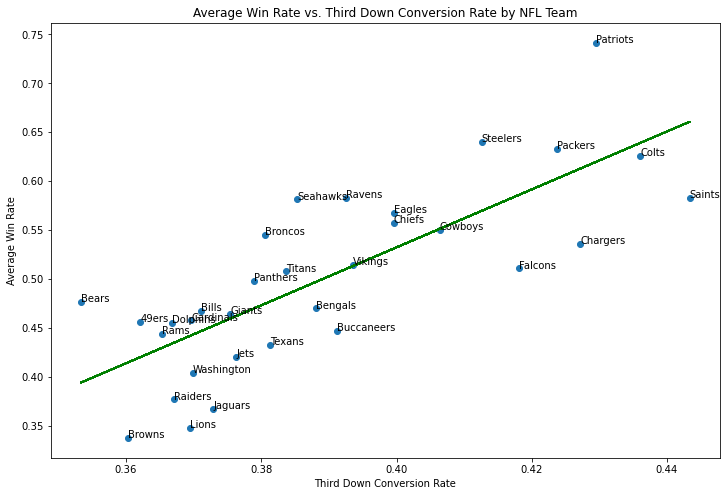

In [17]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['third_down_rate'], team_df['win_rate'])

team_labels = list(team_df['teams'])
third_down_rate = list(team_df['third_down_rate'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (third_down_rate[index], avg_win_rate[index]))
    x = np.array(third_down_rate)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Third Down Conversion Rate")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Third Down Conversion Rate by NFL Team')
plt.show()

Now let's examine the impact of turnovers on games. First, let's make a grouped bar chart of the different types of turnovers (fumbles and interceptions) for winning teams and losing teams.

## 3.1.8 Analysis of Turnovers Impact on NFL Games

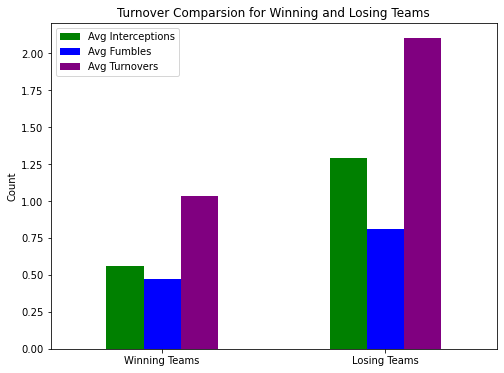

In [18]:
interception_values = []
fumble_values = []
turnover_values = []

win_interception_total = 0
win_fumble_total = 0
lose_interception_total = 0
lose_fumble_total = 0
win_turnover_total = 0
lose_turnover_total = 0

for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_interception_total += row.int_home
        win_fumble_total += row.fumbles_home
        lose_interception_total += row.int_away
        lose_fumble_total += row.fumbles_away
        win_turnover_total += row.turnovers_home
        lose_turnover_total += row.turnovers_away
    else:
        win_interception_total += row.int_away
        win_fumble_total += row.fumbles_away
        lose_interception_total += row.int_home
        lose_fumble_total += row.fumbles_home
        win_turnover_total += row.turnovers_away
        lose_turnover_total += row.turnovers_home
        
interception_values.append(win_interception_total / len(game_df))
interception_values.append(lose_interception_total/ len(game_df))
fumble_values.append(win_fumble_total / len(game_df))
fumble_values.append(lose_fumble_total / len(game_df))
turnover_values.append(win_turnover_total / len(game_df))
turnover_values.append(lose_turnover_total / len(game_df))

index = ['Winning Teams', 'Losing Teams']


df = pd.DataFrame({'Avg Interceptions': interception_values, 'Avg Fumbles': fumble_values, 'Avg Turnovers': turnover_values }, index=index)

ax = df.plot.bar(rot=0, color={"Avg Interceptions": "green", "Avg Fumbles": "blue", 'Avg Turnovers': 'purple'}, ylabel = 'Count', title = 'Turnover' + 
                 ' Comparsion for Winning and Losing Teams', figsize = (8,6))

As we can see from the above bar plot, losing teams have more interceptions and fumbles compared to winning teams. The margin between interceptions and fumbles is also greater for losing teams than it is for winning teams. This may have something to do with losing teams being forced to pass the ball more when they are playing from behind which would lead to potentially more dangerous passes and thus a greater opportunity for the opposing defense to intercept the ball. Lastly, as we can see from the purple bar fur turnovers, the losing team has approximately double the number of turnovers as the winning team so it's clear that there appears to be a negative correlation between turnovers and winning where the more turnovers a team commits, the lower the win rate. Let's solidify this by making a scatter plot of turnovers vs. win rate. 

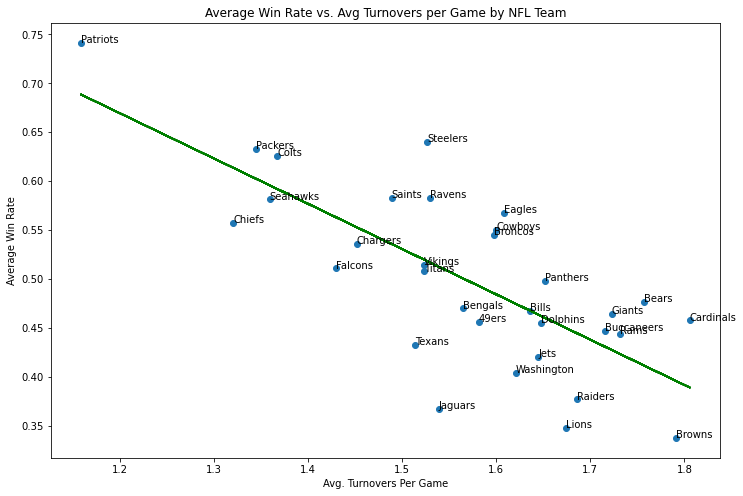

In [19]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['turnover_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
turnover_avg = list(team_df['turnover_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (turnover_avg[index], avg_win_rate[index]))
    x = np.array(turnover_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Turnovers Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Turnovers per Game by NFL Team')
plt.show()

As we can see from the scatter plot above, it confirms that there's a pretty strong inverse correlation between turnovers and win rate where as turnovesr increase, the win rate decreases. Recall, back to our intial plot of win rates by team, we can see here that some of the most successful teams like the Patriots have the lowest average turnover per game at around 1.2 and have nearly a 75% win rate. On the other hand, some of the worst teams we mentioned previosuly such as the Raiders, Lions, and the Browns have some of the highest turnover averages with the Browns at nearly 1.8 per game and a 35% winning percentage.

## 3.1.9 Is there Actually Such Thing As Home Field Advantage?

The next thing we will look at is if home field advantage is actually something that exists or is just a myth. We will also look at 2020 individually because that season was when the COVID-19 pandemic resulted in fans being unable to attend the majority of games. We can then compare to the average from other years to see if factors that are purported to impact games (e.g. fans for the home team that is an "advantage") actually impact the game's outcome. The photo below was taken during a regular season game and as you can see the stadium seats are empty. If you desire to read more about the 2020 season and the oddities of it you can click this link:

**https://www.nfl.com/news/sidelines/2020-in-review-inside-the-most-unique-season-in-nfl-history**

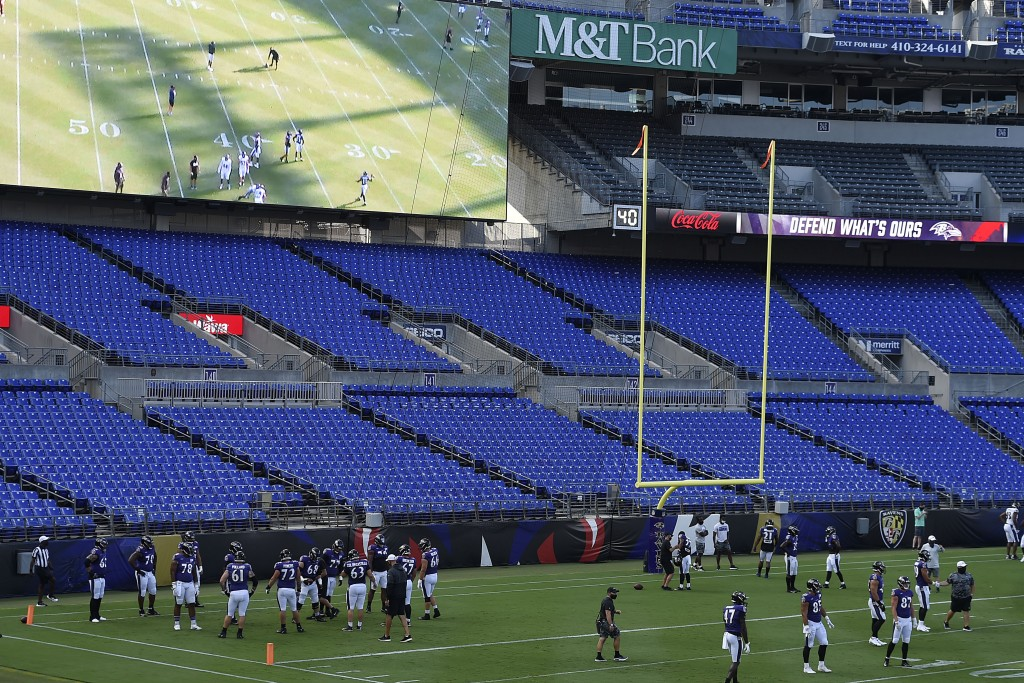

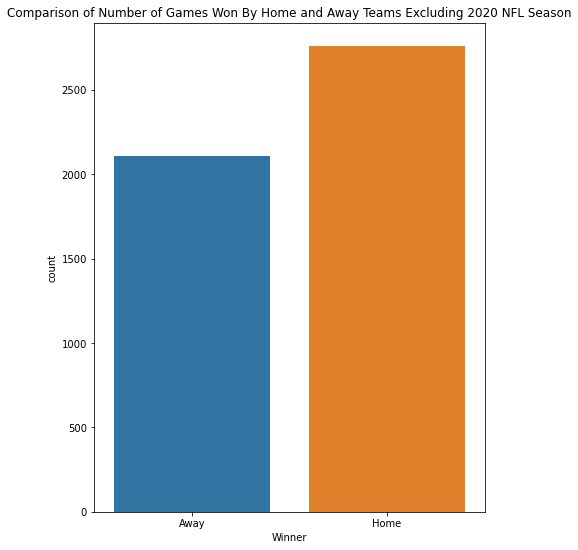

In [20]:
plt.figure(figsize = (7, 9))
plt.title('Comparison of Number of Games Won By Home and Away Teams Excluding 2020 NFL Season')
sns.countplot(x= 'Winner', data = game_df[game_df['season'] != 2020])
plt.show()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_ratio_home,redzone_visits_away,redzone_ratio_away,third_down_ratio_home,third_down_ratio_away,Winner,comp_att_away_ratio,comp_att_home_ratio,sacks_home_cnt,sacks_away_cnt
4803,2020-09-10,Texans,Chiefs,21,28,4-10,7-13,242,203,118,...,0.600,3.0,1.0,0.538462,0.400000,Home,0.625000,0.750000,1.0,4.0
4804,2020-09-13,Seahawks,Falcons,22,28,3-9,7-14,299,434,84,...,0.750,4.0,1.0,0.500000,0.333333,Away,0.885714,0.685185,2.0,3.0
4805,2020-09-13,Jets,Bills,15,31,4-11,7-14,202,306,52,...,0.375,2.0,0.5,0.500000,0.363636,Home,0.600000,0.717391,3.0,3.0
4806,2020-09-13,Bears,Lions,26,25,2-11,6-16,214,288,149,...,0.400,4.0,0.5,0.375000,0.181818,Away,0.555556,0.571429,1.0,1.0
4807,2020-09-13,Packers,Vikings,31,25,6-11,3-6,364,248,158,...,0.750,6.0,0.5,0.500000,0.545455,Away,0.727273,0.760000,2.0,0.0


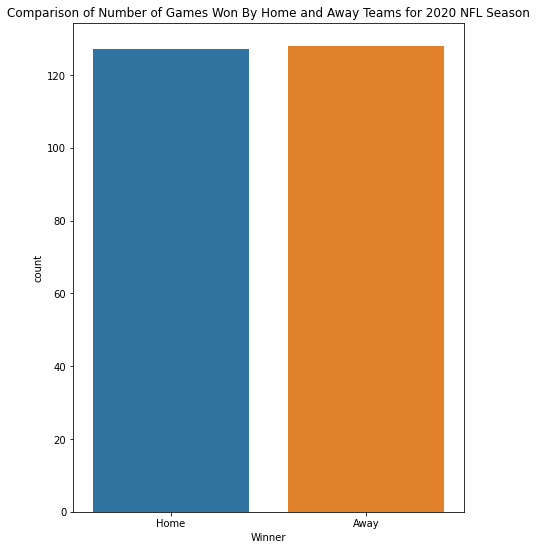

In [21]:
season_2020_df = game_df[game_df['season'] == 2020]
display(season_2020_df.head())

plt.figure(figsize = (7, 9))
plt.title('Comparison of Number of Games Won By Home and Away Teams for 2020 NFL Season')
sns.countplot(x= 'Winner', data = season_2020_df)
plt.show()

As we can see from the plots above, we have have some very interesting results. It appears that home field advantage is actually a thing because as for all other seasons excluding 2020, it appears in total home teams won about 500+ more games than away teams. However, in the 2020 season home and away teams actually had almost the exact same number of games won. From this it appears home field advantage isn't actually a myth and factors like crowd noise may actually have a significant impact on the winner of the game. I guess the "12s" as the Seattle Seahawks put it aren't ridiculous after all. :) **https://www.seahawks.com/fans/the-12s/**

## 3.2.1 Impact of Penalties on Games

First, let's just compare the number of penalties and penalty yards between winning and losing teams using some bar graphs. 

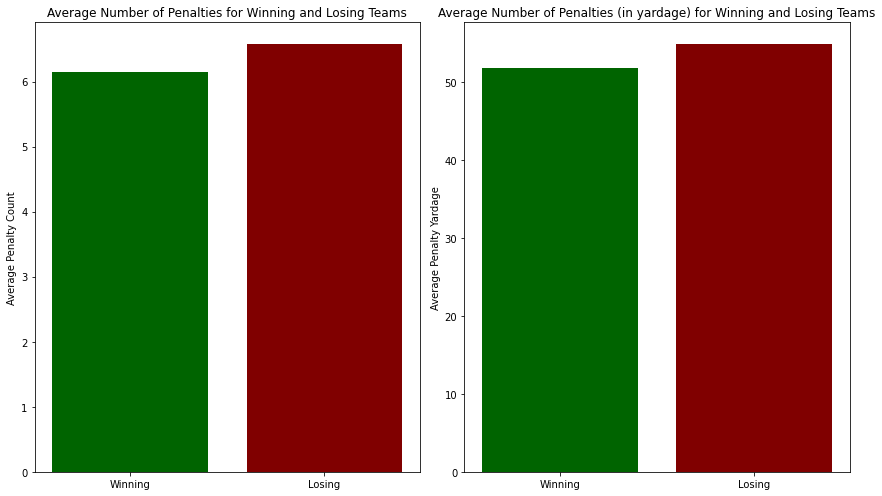

In [22]:
penalties_winning_teams = []
penalties_losing_teams = []
penalties_yards_winning_teams = []
penalties_yards_losing_teams = []

for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        penalties_winning_teams.append(row.penalty_cnt_home)
        penalties_yards_winning_teams.append(row.penalty_yards_home)
        penalties_losing_teams.append(row.penalty_cnt_away)
        penalties_yards_losing_teams.append(row.penalty_yards_away)
    else:
        penalties_winning_teams.append(row.penalty_cnt_away)
        penalties_yards_winning_teams.append(row.penalty_yards_away)
        penalties_losing_teams.append(row.penalty_cnt_home)
        penalties_yards_losing_teams.append(row.penalty_yards_home)

        
penalties_winning_teams_avg = sum(penalties_winning_teams) / len(penalties_winning_teams)
penalties_losing_teams_avg = sum(penalties_losing_teams) / len(penalties_losing_teams)

penalties_winning_teams_yards_avg = sum(penalties_yards_winning_teams) / len(penalties_yards_winning_teams)
penalties_losing_teams_yards_avg = sum(penalties_yards_losing_teams) / len(penalties_yards_losing_teams)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))


axes[0].title.set_text('Average Number of Penalties for Winning and Losing Teams')
axes[0].set(ylabel="Average Penalty Count")
labels = ['Winning', 'Losing']
values = [penalties_winning_teams_avg, penalties_losing_teams_avg]
axes[0].bar(labels, values, color = ['darkgreen', 'maroon'])


axes[1].set(ylabel="Average Penalty Yardage")
axes[1].title.set_text('Average Number of Penalties (in yardage) for Winning and Losing Teams')
values = [penalties_winning_teams_yards_avg, penalties_losing_teams_yards_avg]
axes[1].bar(labels, values, color = ['darkgreen', 'maroon'])
fig.tight_layout()
plt.show()
    

From the above plots, we can see that there isn't a massive difference but there still exists a gap in the penalties and penalty yardages for winning and losing teams. For winning teams, the average number of penalties is around 6 while losing teams have around 6.5 penalties. For yardage, winning teams on average commit 51 yards in penalties while losing teams are slightly more around 53. This gap still isn't super massive so let's try and plot the average winning percentage vs. penalties for the different teams.

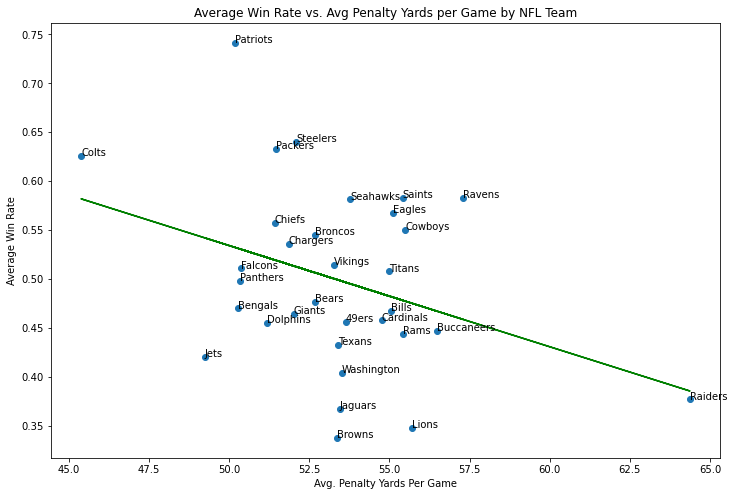

In [23]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['penalties_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
penalty_yards_avg = list(team_df['penalties_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (penalty_yards_avg[index], avg_win_rate[index]))
    x = np.array(penalty_yards_avg)
    y = np.array(avg_win_rate)
    
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Penalty Yards Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Penalty Yards per Game by NFL Team')
plt.show()

From the graph we can see a negative correlation between penalty yards per game and the averge win rate for teams. It's interesting that the majority of teams actually have a similiar number of penalty yardage per game around 50 to 58 but about half of the teams are above the regression line and have a 50% or better winning percentage while about half of the other teams are below the regression line. The only obvious outliers outside of the cluster in the center is the raiders which are by far the most penalized team at nearly 65 yards per game and about a 40% winning rate and the Colts who have a very low penalty yardage per game at around 45 yards. Additionally, the Patriots are an outlier as they are on the lower average of penalty yards at around 51 but have nearly a 75% winning rate.

## 3.2.2 Time is Everything?

The next thing we will examine is the impact of time of possession on the win rate of different NFL teams and see what impact this has on the outcome of games.

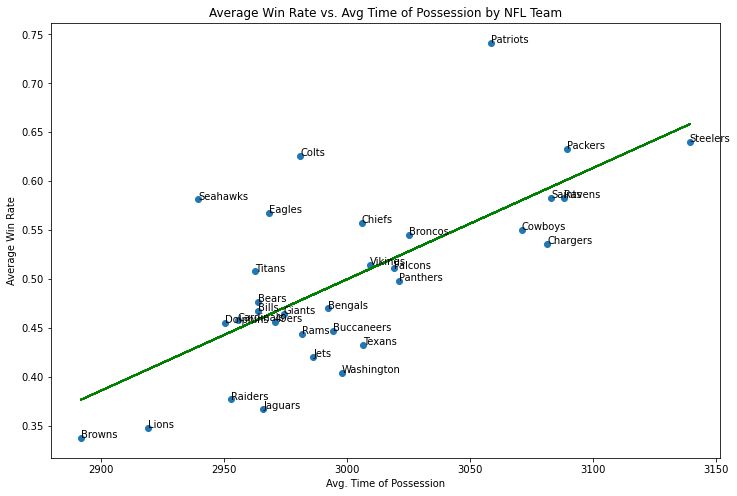

In [24]:
plt.figure(figsize = (12, 8))        
plt.scatter(team_df['possession_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
possession_avg = list(team_df['possession_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (possession_avg[index], avg_win_rate[index]))
    x = np.array(possession_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Time of Possession")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Time of Possession by NFL Team')
plt.show()

Remember that the x-axis values are in minutes where 3050 represents 30:50 (30 minutes and 50 seconds). Overall, we can see that there's a relatively strong correlation from the regression line that as the time of possession increases the win rate for teams increases. At the same time, if we really examine the plot closely, the margin of time difference between teams at opposite ends of the plot are drastic in their win rate difference. For example, the Steelers, Ravens, Patriots, and Packers only have around 1 to 2 minutes more time of posession more compared to some of the teams that win the least like the Browns, Lions, and Raiders but the there's a nearly 30% win rate difference between them. 

## 3.2.3 Driving to the Zone

Our final section in our exploratory analysis is to examine the effect of drives on games. We have columns for the number of drives and redzone drives so we'll take a look at both of them. If you're curious what redzone means, it's the area on the field between the 20 yard line and the end zone. Check out this Wikipedia page if you want to read a little bit more about it: 
**https://en.wikipedia.org/wiki/Red_zone_(gridiron_football)#:~:text=In%20gridiron%20football%2C%20the%20red,line%20and%20the%20goal%20line.**

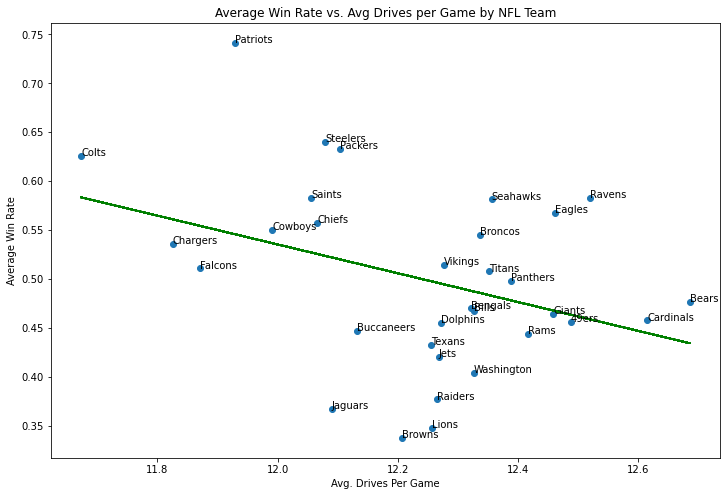

In [25]:
#display(team_df)

plt.figure(figsize = (12, 8))        
plt.scatter(team_df['drives_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
drives_avg = list(team_df['drives_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (drives_avg[index], avg_win_rate[index]))
    x = np.array(drives_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Drives Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Drives per Game by NFL Team')
plt.show()

From the above scatter plot, there's a negative correlation between drives per game the win rate for a team. This is pretty surprising as before plotting, I thought more drives would result in a higher win rate because it makes sense that the more chances you have the ball the better chance you have at winning the game. However, the plot above actually suggests the opposite as some of the most successful teams we've seen thus far like the Patriots and the Colts actually have lower average drives per game compared to the majority of other teams who are clustered around 12.2 and 12.5 drives per game. Let's now investigate the impact of red zone drives on the win rate for NFL teams.

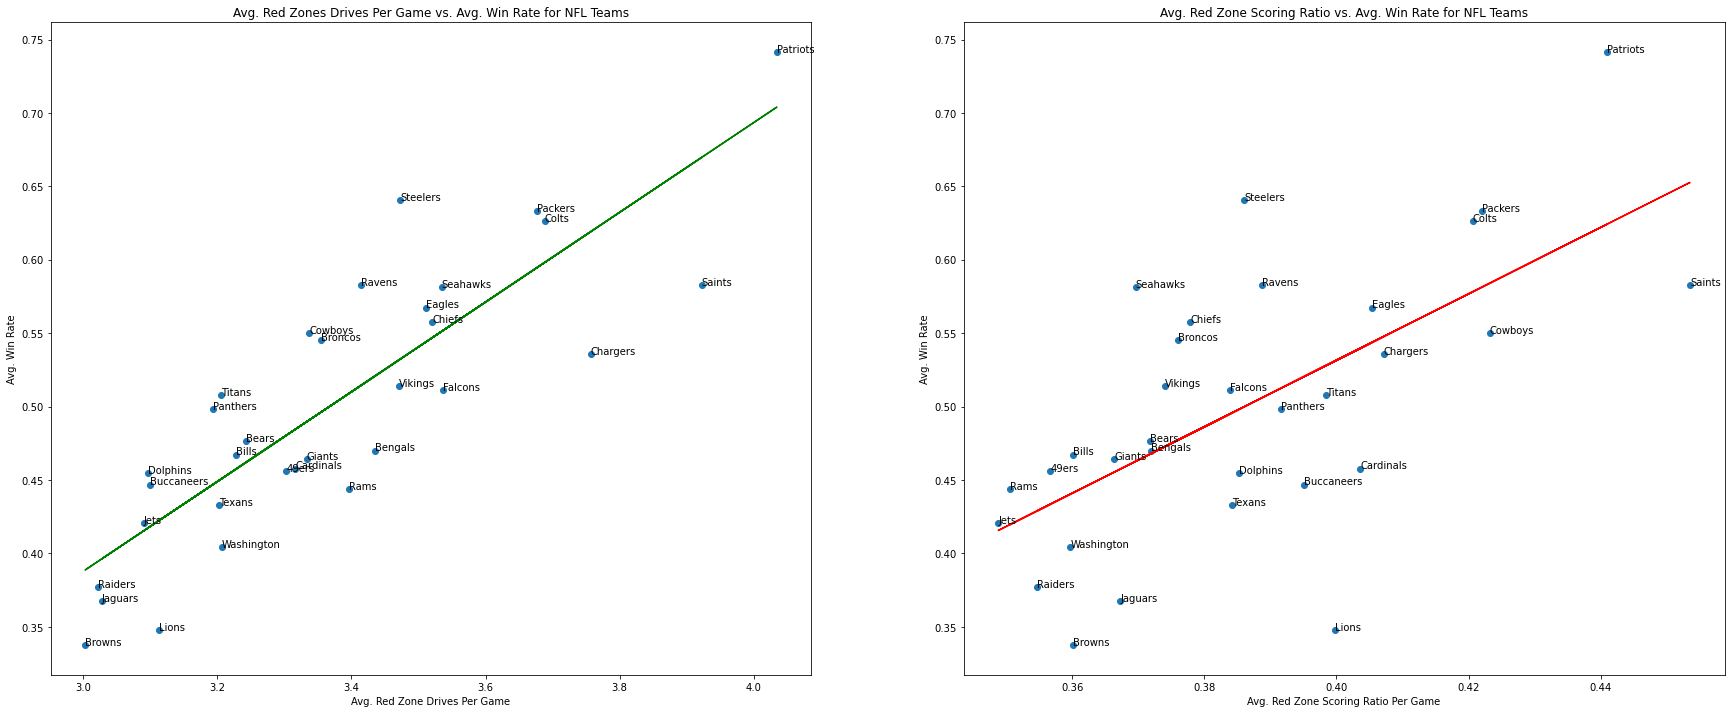

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))        
axes[0].scatter(team_df['redzone_trips_avg'], team_df['win_rate'])
axes[1].scatter(team_df['redzone_ratio'], team_df['win_rate'])


team_labels = list(team_df['teams'])
redzone_trips_avg = list(team_df['redzone_trips_avg'])
redzone_ratio = list(team_df['redzone_ratio'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    axes[0].annotate(team_label, (redzone_trips_avg[index], avg_win_rate[index]))
    axes[1].annotate(team_label, (redzone_ratio[index], avg_win_rate[index]))
    
x = np.array(redzone_trips_avg)
y = np.array(avg_win_rate)
    
m, b = np.polyfit(x, y, 1)
axes[0].plot(x, m*x + b, color = 'g')

x = np.array(redzone_ratio)
m, b = np.polyfit(x, y, 1)
axes[1].plot(x, m*x + b, color = 'r')

axes[0].set(xlabel = "Avg. Red Zone Drives Per Game")
axes[0].set(ylabel = "Avg. Win Rate")
axes[0].set(title = "Avg. Red Zones Drives Per Game vs. Avg. Win Rate for NFL Teams")
axes[1].set(xlabel = "Avg. Red Zone Scoring Ratio Per Game")
axes[1].set(ylabel = "Avg. Win Rate")
axes[1].set(title = "Avg. Red Zone Scoring Ratio vs. Avg. Win Rate for NFL Teams")
plt.show()

Here we see an opposite relationship compared to the number of drives per game. While drives per game had an inverse relationship with win rate, here red zone drives per game and red zone scoring ratio (number of times the team scored while in the red zone) have a positive relationship with average win rate. Although, I would say visually comparing the two red zone plots, the number of of red zone drives has a steeper slope compared to red zone scoring ratio which suggests it's a slightly better indicator of who wins a game compared to the red zone scoring ratio.   

# 3.1.3 Analysis Summary 

The next step in our data science pipeline will be developing our predictive model. However, before we continue on let's try to visually summarize the different aspects of NFL games we've gone in depth with during our exploratory data analsyis section. We can do this by creating a heat map which will show the correlations between the different aspects like third down rate compared to the win rate. From this map, we can quickly recap the information we've discovered in this section before we continue on to creating our model. To read the model, positive numbers indicate a postive correlation while negative numbers in the cell indicate an inverse relationship. For example, for red zone drives average we plotted above we saw a postive correlation and here we see a value of 0.85 for the cell for win_rate and redzone_trips_avg in the lower left hand corner of the plot.



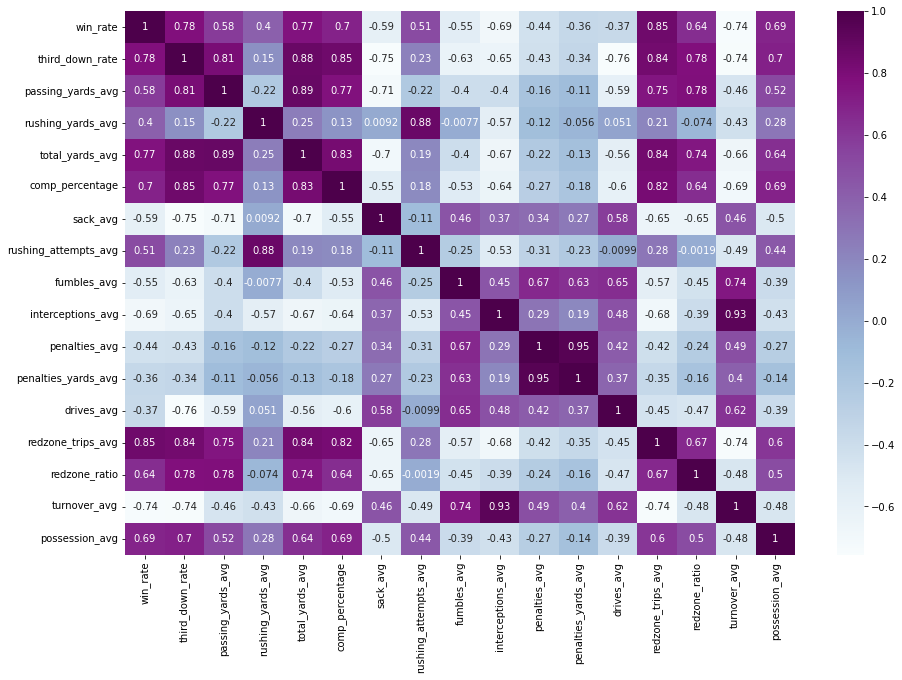

In [27]:
plt.figure(figsize=(15, 10))
corr = team_df.corr()
sns.heatmap(corr,annot= True, cmap="BuPu")
plt.show()

## 4.1 Predictive Model/Hypothesis Testing

Now we will move onto the next stage of our data science pipeline which will be building a predictive model for who wins an NFL game. In order to do so we will first need to decide which predictors we want to use for our model. As we saw from our exploratory analysis there are a plethora of factors which impact the teams that win the most. In order to decide which factors we will keep we will first run a bunch of hypothesis tests on the different factors. After we decide on our chosen factors we will then run a Machine Learning algorithm and train it to predict the outcome of games.

In [28]:
# function for us to run hypothesis test on each of the different game factors
def hypothesisTest(factor):
    results = []
    model2 = smf.ols('win_rate ~' + factor, data = team_df)
    model2_ = model2.fit()
    results.append(model2_.pvalues[1])
    results.append(model2_.rsquared)
    #print(factor + ': ' + str(model2_.pvalues[1]))
    return results

# create a new dataframe for the game factors and r^2 values
game_factors_df = pd.DataFrame()
game_factors_lst = ['third_down_rate', 'passing_yards_avg', 'rushing_yards_avg', 'total_yards_avg', 'fumbles_avg', 'interceptions_avg', 'penalties_avg', 'penalties_yards_avg', 'drives_avg', 'redzone_trips_avg', 'redzone_ratio',
                    'turnover_avg', 'possession_avg', 'comp_percentage', 'sack_avg']
pvalues_lst = []
r2values_lst = []

for factor in game_factors_lst:
    results = hypothesisTest(factor)
    pvalues_lst.append(results[0])
    r2values_lst.append(results[1])
    
game_factors_df['factors'] = game_factors_lst
game_factors_df['p-values'] = pvalues_lst
game_factors_df['r-2values'] = r2values_lst

display(game_factors_df)


,factors,p-values,r-2values
0,third_down_rate,1.824997e-07,0.601902
1,passing_yards_avg,4.535306e-04,0.340692
2,rushing_yards_avg,2.313862e-02,0.160360
3,total_yards_avg,3.094967e-07,0.587926
4,fumbles_avg,9.839978e-04,0.307748
5,interceptions_avg,1.066285e-05,0.481362
6,penalties_avg,1.240700e-02,0.190898
7,penalties_yards_avg,4.543142e-02,0.126838
8,drives_avg,3.986710e-02,0.133351
9,redzone_trips_avg,7.089699e-10,0.723491


From the above dataframe we've created, we can see that the p-values are all less than 0.05 so I would say they're all significant. Thus, in order to further narrow which factors we will actually keep, I'm electing to look at the r^2 values and choose the highest ones. Essentially, the higher the r^2 value, the better that factor is in fitting the model for win percentages for the different teams which allow us to pick the best predictors for games. Looking at the results, some of the lowest r^2 values include the rushing_yards_avg, penalties_avg, penalties_yards_avg, and drives_avg. So let's drop these particular factors. 

In [29]:
game_factors_df = game_factors_df[game_factors_df.factors != 'rushing_yards_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'penalties_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'penalties_yards_avg']
game_factors_df = game_factors_df[game_factors_df.factors != 'drives_avg']

display(game_factors_df)
display(game_df)

,factors,p-values,r-2values
0,third_down_rate,1.824997e-07,0.601902
1,passing_yards_avg,4.535306e-04,0.340692
3,total_yards_avg,3.094967e-07,0.587926
4,fumbles_avg,9.839978e-04,0.307748
5,interceptions_avg,1.066285e-05,0.481362
9,redzone_trips_avg,7.089699e-10,0.723491
10,redzone_ratio,7.123144e-05,0.413958
11,turnover_avg,1.054007e-06,0.553655
12,possession_avg,1.444383e-05,0.471098
13,comp_percentage,8.994303e-06,0.487035


,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_ratio_home,redzone_visits_away,redzone_ratio_away,third_down_ratio_home,third_down_ratio_away,Winner,comp_att_away_ratio,comp_att_home_ratio,sacks_home_cnt,sacks_away_cnt
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,166,318,113,...,0.000000,8.0,0.000000,0.562500,0.333333,Away,0.615385,0.622222,3.0,0.0
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,193,242,73,...,0.000000,9.0,0.000000,0.411765,0.250000,Away,0.800000,0.666667,4.0,3.0
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,228,288,140,...,0.000000,7.0,0.000000,0.538462,0.384615,Home,0.571429,0.606061,1.0,1.0
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,160,167,241,...,0.000000,7.0,0.000000,0.363636,0.600000,Away,0.789474,0.580645,4.0,1.0
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,276,352,194,...,0.000000,10.0,0.000000,0.363636,0.454545,Away,0.689655,0.700000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,2022-01-09,49ers,Rams,23,19,9-14,10-17,314,201,135,...,0.750000,4.0,0.500000,0.588235,0.642857,Away,0.727273,0.656250,5.0,3.0
5340,2022-01-09,Patriots,Dolphins,21,23,5-10,7-15,245,103,134,...,0.666667,4.0,0.750000,0.466667,0.500000,Home,0.666667,0.681818,1.0,2.0
5341,2022-01-09,Seahawks,Cardinals,19,20,8-12,9-18,229,187,202,...,0.333333,3.0,0.666667,0.500000,0.666667,Away,0.576923,0.717949,5.0,1.0
5342,2022-01-09,Panthers,Buccaneers,18,21,4-14,4-11,207,324,110,...,1.000000,4.0,0.500000,0.363636,0.285714,Home,0.674419,0.743590,1.0,2.0


Now that we've decided on our factors let's select them from the game_df dataframe (e.g. since third_down_rate is a factor we will keep the third_down_rate for each team in a game). Then, we will build our decision tree model using the decisiontreeclassifier from the scikit-learn library. In our model, we will use hold out validation where 35% of the data will be used for the test set and 65% of the data will be used to train the model. Here our x will include all the different factors or features we will use to predict the winner of the game and our target is the winner of the game. 

# **ADD SECTION FOR COMPLETION ATTEMPTS AND SACKS**

In [38]:
#display(game_df.columns)
factors = ['passing_yards_away', 'passing_yards_home', 
       'total_yards_away', 'total_yards_home', 'fumbles_away', 'fumbles_home', 'int_away',
       'int_home', 'turnovers_away', 'turnovers_home', 'redzone_visits_home', 'redzone_ratio_home','redzone_visits_away', 'redzone_ratio_away',
        'third_down_ratio_home',
       'third_down_ratio_away', 'possession_away', 'possession_home', 'comp_att_away_ratio', 'comp_att_home_ratio', 'sacks_home_cnt', 'sacks_away_cnt']
        
target = ['Winner']

#game_df['away'] = game_df['away'].str.get_dummies().values.tolist()
#game_df['home'] = game_df['home'].str.get_dummies().values.tolist()

x = game_df[factors]
y = game_df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state= 1) 

# create decision tree instance
dt_classifier = DecisionTreeClassifier()


# fit the data
dt_classifier = dt_classifier.fit(X_train,y_train)

# get the predictions on the trained model
predictions = dt_classifier.predict(X_test)

# output the model's accuracy
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(y_test, predictions)))

Decision Tree Accuracy: 0.7506971556051311


From the accuracy score, we can see that the decision tree only was able to correctly predict the winner about 74% of the time. Let's try improving that by using a different model, the random forest. Essentially, the random forest is a more powerful version of the decision where we used multiple trees rather than a single tree to make classifications (in our case the winner of the game) which should make the model more accuracte and make it more resistant to overfitting.

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.35, random_state= 1) 
# create random forest instance
rf_classifier = RandomForestClassifier()


# fit the data
rf_classifier = rf_classifier.fit(X_train2,y_train2.values.ravel())

# get the predictions on the trained model
predictions = rf_classifier.predict(X_test2)


# output the model's accuracy
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(y_test2, predictions)) + '\nPredictions\n-------------------------------------------------')


# grab first 200 rows (this is just to avoid outputing over 1000 lines of output)
output_df = game_df[0: 200]
#display(output_df)

# output the predictions
for index, row in output_df.iterrows():
    predicted_winner = ''
    if index == len(predictions):
        break
    if predictions[index] == 'Home':
        predicted_winner = row.home
    else:
        predicted_winner = row.away
        
    if row.score_away > row.score_home:
        print('Actual Winner: ' + row.away + ' Predicted Winner: ' +  predicted_winner)
    else:
        print('Acutal Winner: ' + row.home + ' Predicted Winner: ' + predicted_winner)

Random Forest Accuracy: 0.8477412158393753
Predictions
-------------------------------------------------
Actual Winner: 49ers Predicted Winner: 49ers
Actual Winner: Jets Predicted Winner: Jets
Acutal Winner: Bears Predicted Winner: Vikings
Actual Winner: Chargers Predicted Winner: Chargers
Actual Winner: Chiefs Predicted Winner: Chiefs
Acutal Winner: Packers Predicted Winner: Packers
Acutal Winner: Titans Predicted Winner: Titans
Acutal Winner: Dolphins Predicted Winner: Dolphins
Acutal Winner: Washington Predicted Winner: Washington
Acutal Winner: Panthers Predicted Winner: Ravens
Actual Winner: Colts Predicted Winner: Colts
Acutal Winner: Broncos Predicted Winner: Broncos
Acutal Winner: Raiders Predicted Winner: Raiders
Actual Winner: Saints Predicted Winner: Saints
Acutal Winner: Texans Predicted Winner: Cowboys
Acutal Winner: Patriots Predicted Winner: Patriots
Actual Winner: Bears Predicted Winner: Falcons
Acutal Winner: Browns Predicted Winner: Browns
Acutal Winner: Cowboys Predi

From the accuracy score, we can see that the prediction percentage went up to nearly 83%! Obviously, we wish that the model could be in the 90% but the fact that we were able to get about a 10% increase in accuracy from switching from a decision tree to random forest model is a great improvement. 

## 5.1 Communication of Insights

From this 